In [3]:
# In a Jupyter Notebook cell
import logging
from brancharchitect.io import read_newick, parse_newick
from brancharchitect.plot.tree_plot import plot_circular_trees_in_a_row
from brancharchitect.leaforder.benchmark_utilities import profile_and_visualize
from brancharchitect.leaforder.old.tree_order_optimisation_local import (
    optimize_s_edge_splits,
    optimize_unique_splits,
)
from brancharchitect.leaforder.tree_order_optimisation_classic import (
    optimize_s_edge_splits,
    optimize_unique_splits,
)
from brancharchitect.leaforder.tree_order_optimisation_global import (
    collect_distances_for_trajectory,
)

# Configure logging
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

In [4]:


"""
# [0.0, 0.0, 0.0, 0.2857142857142857, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
# [0.0, 0.0, 0.19, 0.095, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]+
#  0-1  1-2  2-3   3-4    4-5  5-6  6-7  7-8  8-9  9-10 10-11
# Step 1: Read original trees
# Update file path as needed
original_trees = read_newick("./../data/five_taxa_all_permutations.newick")
# Extract all taxa
method1_trees = [tree.deep_copy() for tree in original_trees]
method1_distances, pairs = collect_distances_for_trajectory(method1_trees)
plot_circular_trees_in_a_row(
    method1_trees,
    size=250,  # each tree gets a 300x300 bounding box
    margin=20,
    label_offset=3,
    ignore_branch_lengths=False,
)


method2_trees = [tree.deep_copy() for tree in original_trees]

smooth_order_of_trees_classic(
    method2_trees,
    [optimize_unique_splits, optimize_s_edge_splits],
    backward=True,
)

    

method2_distances, _ = collect_distances_for_trajectory(method2_trees)
plot_circular_trees_in_a_row(
    method2_trees,
    size=250,  # each tree gets a 300x300 bounding box
    margin=20,
    label_offset=3,
    ignore_branch_lengths=False,
)

for i in range(len(method2_trees) - 1):
    
    print(f"Optimizing trees {i} and {i + 1}...")
    
    improve_single_pair(
        tree1=method2_trees[i],
        tree2=method2_trees[i + 1],
        rotation_functions=[optimize_unique_splits, optimize_s_edge_splits],
    )

    improve_single_pair(
        tree1=method2_trees[i + 1],
        tree2=method2_trees[i],
        rotation_functions=[optimize_unique_splits, optimize_s_edge_splits],
    )
    
for i in range(1, len(method2_trees) - 1, -1):
    
    improve_single_pair(
        tree1=method2_trees[i-1], 
        tree2=method2_trees[i], 
        rotation_functions=[optimize_common_splits, optimize_s_edge_splits]
    ) 
    

file_path = "./../data/five_taxa_all_permutations.newick"

# Read trees
original_trees = read_newick(file_path)

midpoint_rooted_trees = []
original_trees = [original_trees[1]]
for tree in original_trees:
    new_tree = tree.midpoint_root()
    print("Before:", tree.get_current_order())
    print("After:", new_tree.get_current_order())
    print(new_tree.to_newick())
    midpoint_rooted_trees.append(new_tree)


test_trees = parse_newick("((A:3,B:1):2,(C:1,D:1):1);")
print(test_trees.to_newick())
mid_point = test_trees.midpoint_root()
print(mid_point.to_newick())

test_trees = parse_newick("((A:3,B:1):2,((C:1,D:1),(E:1,F:6)):1);")
print(test_trees.to_newick())
mid_point = test_trees.midpoint_root()
print(mid_point.to_newick())

original_trees = midpoint_rooted_trees

profile_and_visualize(
    filepath=file_path,
    optimize_both_sides=False,
    backward=True,
    iterations=20,
    midpoint_rooted=False,
)
"""

'\n# [0.0, 0.0, 0.0, 0.2857142857142857, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]\n# [0.0, 0.0, 0.19, 0.095, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]+\n#  0-1  1-2  2-3   3-4    4-5  5-6  6-7  7-8  8-9  9-10 10-11\n# Step 1: Read original trees\n# Update file path as needed\noriginal_trees = read_newick("./../data/five_taxa_all_permutations.newick")\n# Extract all taxa\nmethod1_trees = [tree.deep_copy() for tree in original_trees]\nmethod1_distances, pairs = collect_distances_for_trajectory(method1_trees)\nplot_circular_trees_in_a_row(\n    method1_trees,\n    size=250,  # each tree gets a 300x300 bounding box\n    margin=20,\n    label_offset=3,\n    ignore_branch_lengths=False,\n)\n\n\nmethod2_trees = [tree.deep_copy() for tree in original_trees]\n\nsmooth_order_of_trees_classic(\n    method2_trees,\n    [optimize_unique_splits, optimize_s_edge_splits],\n    backward=True,\n)\n\n\n\nmethod2_distances, _ = collect_distances_for_trajectory(method2_trees)\nplot_circular_trees_in_a_row(\n    method2

INFO:root:Starting profiling...


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Original Order: No reordering or optimization; baseline.
Fiedler Order Only: Applies consensus Fiedler (spectral) ordering to all trees, but no further optimization.
TreeOrderOptimizer Local (forward): Runs the local optimizer in forward mode only (left-to-right).
TreeOrderOptimizer Local (bidirectional): Runs the local optimizer in both directions (left-to-right and right-to-left).
Fiedler + TreeOrderOptimizer (forward): Applies Fiedler ordering, then runs the local optimizer in forward mode.
Fiedler + TreeOrderOptimizer (bidirectional): Applies Fiedler ordering, then runs the local optimizer in both directions.


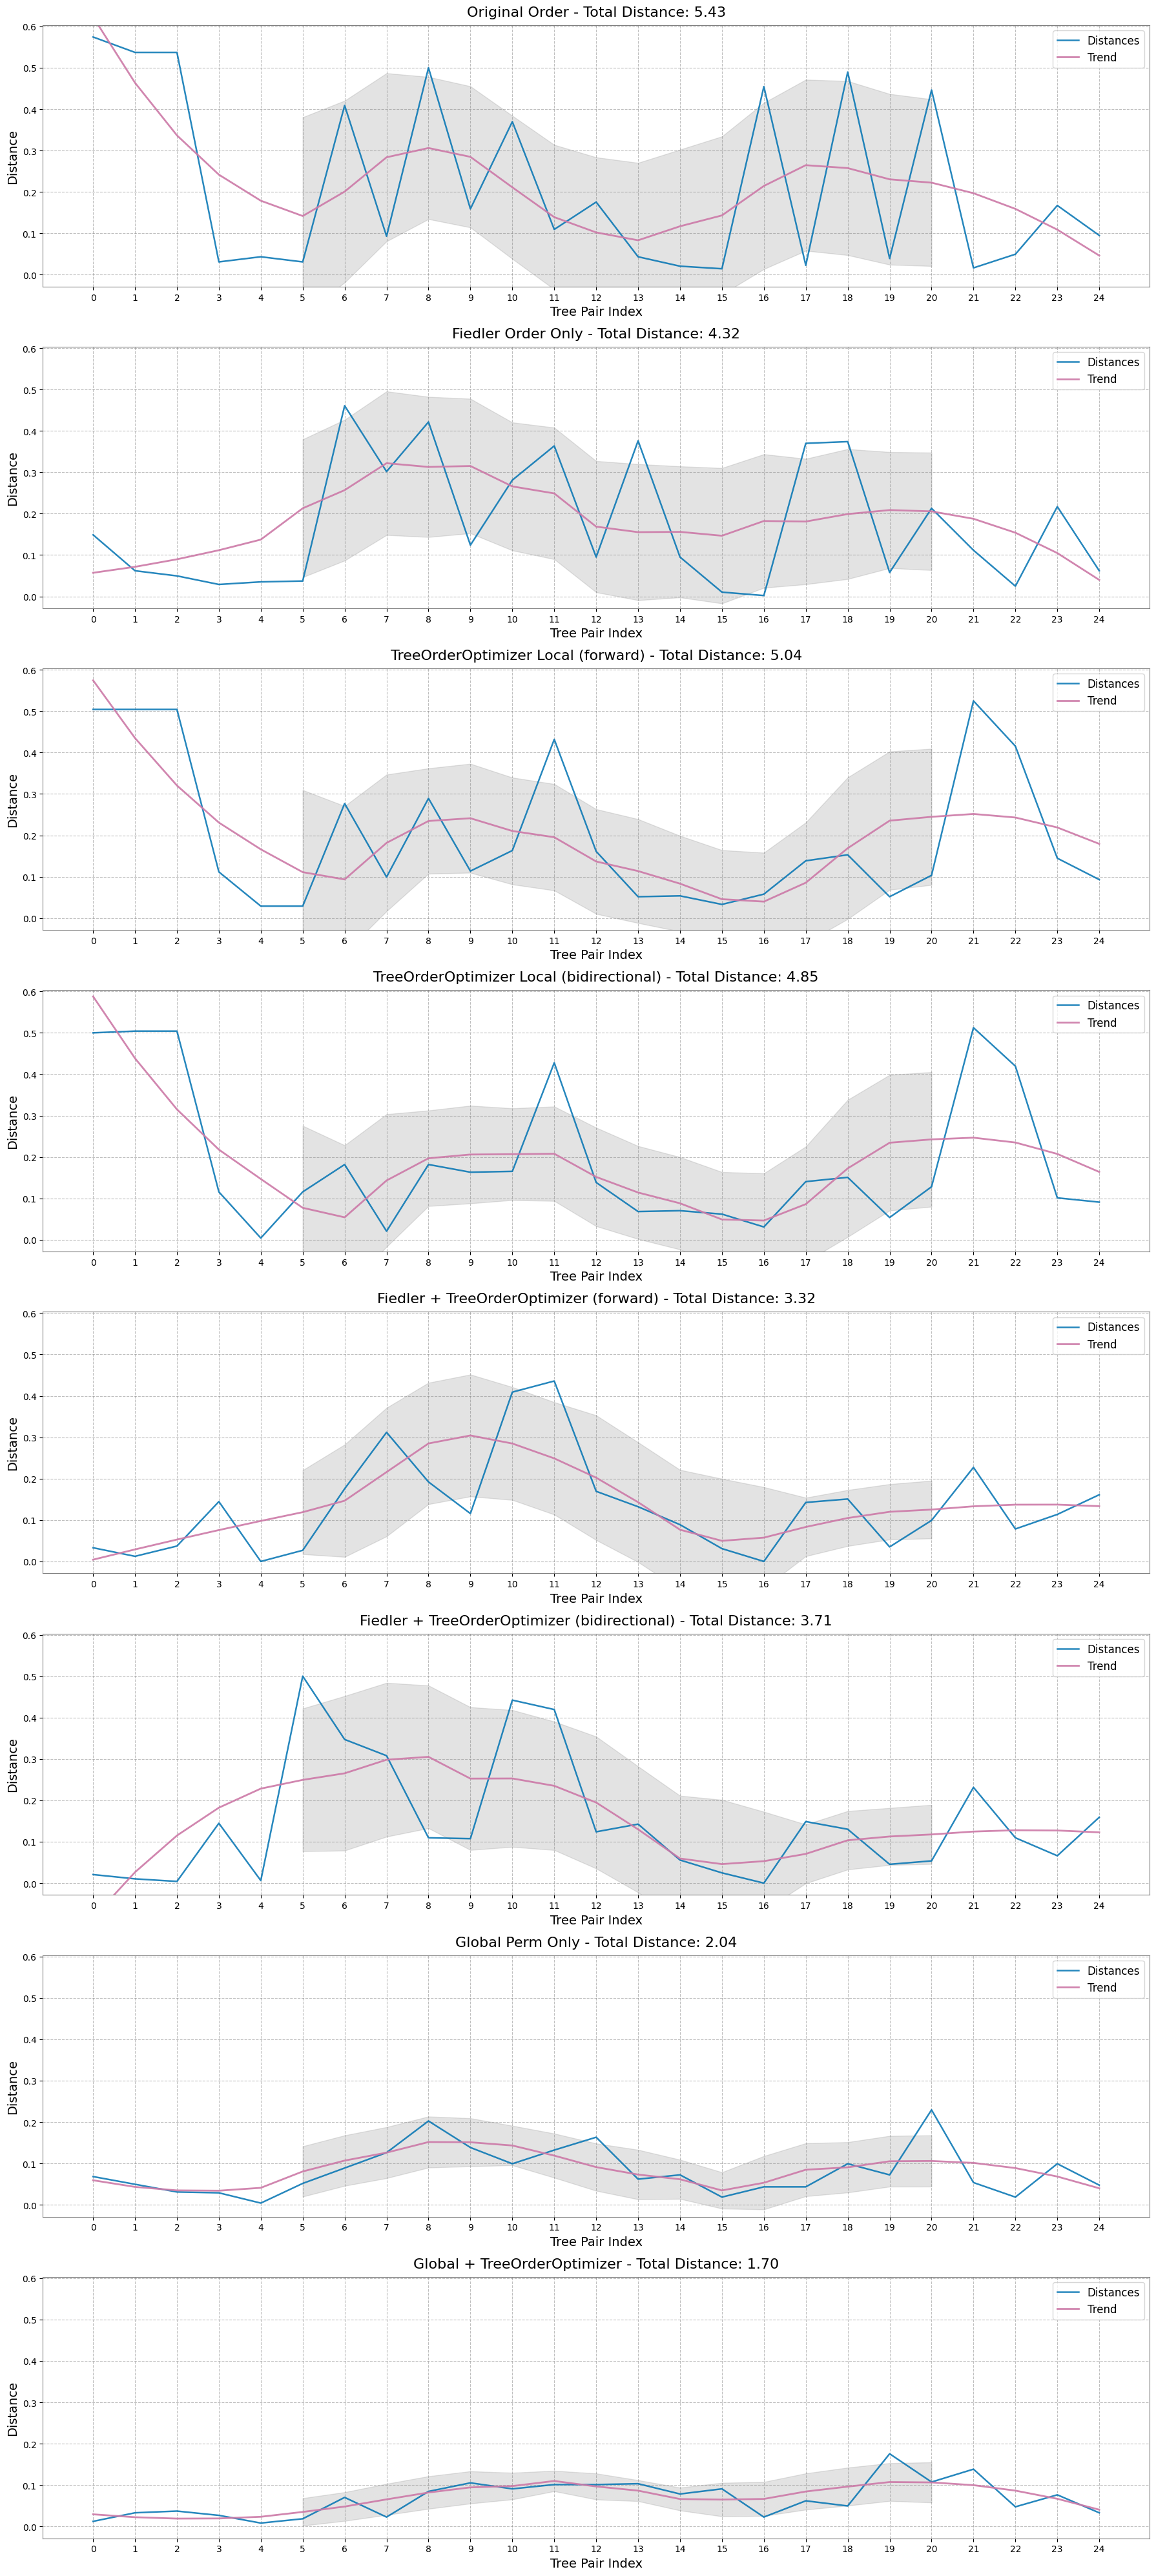

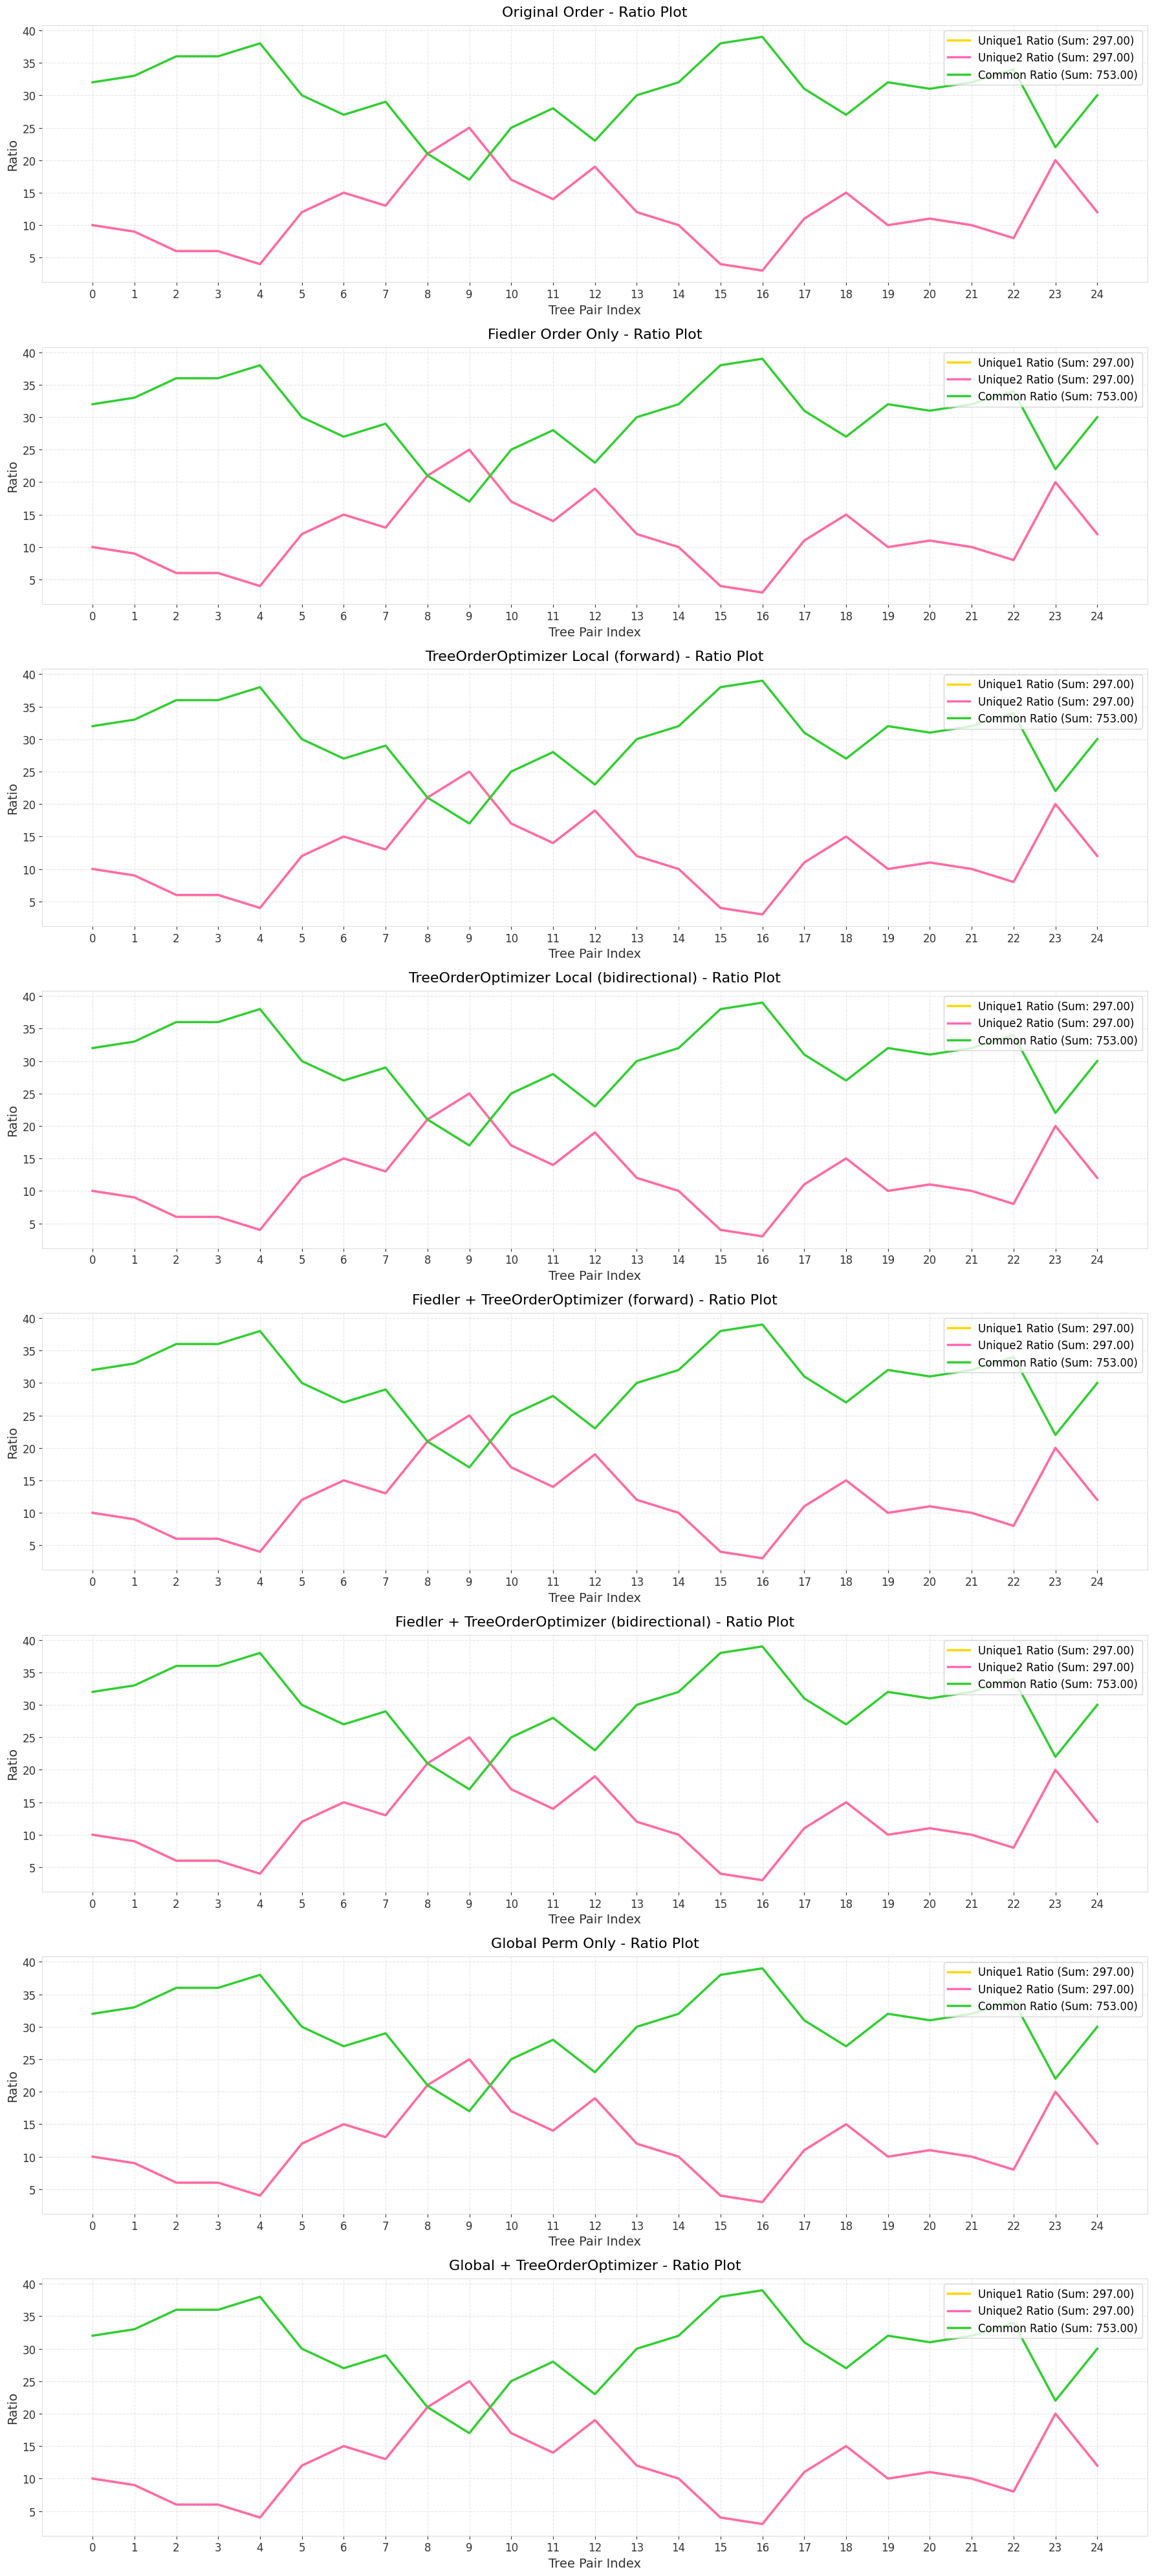

INFO:root:Profiling completed successfully.



Profile Summary:
Total time: 27.65s
Number of unique functions: 24

Top 5 time-consuming functions:
                                       Function  Total Time (s)     Time %     Calls
12                     get_leaves (tree.py:289)        3.446563  12.463250    201639
14                          __eq__ (tree.py:96)        2.242683   8.109854  10289237
6       <built-in method builtins.sorted> (~:0)        1.755150   6.346867   1679307
5   <built-in method builtins.isinstance> (~:0)        1.411358   5.103668  32587346
11                     __eq__ (partition.py:42)        1.202203   4.347334  10355481


Function  \
0                               cast (typing.py:2187)   
4               <built-in method builtins.hash> (~:0)   
17                            <genexpr> (tree.py:308)   
13                 reverse_encoding (partition.py:95)   
18                            to_splits (tree.py:114)   
3               <method 'add' of 'set' objects> (~:0)   
19                         __hash__ (partition.py:92)   
22  classify_subtrees_using_set_ops (tree_order_ut...   
8                     __init__ (partition_set.py:139)   
15                    __iter__ (partition_set.py:177)   
20                    <lambda> (partition_set.py:179)   
2           <method 'extend' of 'list' objects> (~:0)   
1                               inner (typing.py:392)   
7          isdisjoint (<frozen _collections_abc>:625)   
21   _collect_subtree_splits (tree_order_utils.py:21)   
16                             __hash__ (tree.py:101)   
10                         add (partition_set.py:184)   
9                 __contains__ (partition_set.py:166)   
23  <method 'encode' of 'ImagingEncoder' objects> ...   
11                           __eq__ (partition.py:42)   
5         <built-in method builtins.isinstance> (~:0)   
6             <built-in method builtins.sorted> (~:0)   
14                                __eq__ (tree.py:96)   
12                           get_leaves (tree.py:289)   

                       Module  Line  \
0                   typing.py  2187   
4                           ~     0   
17                    tree.py   308   
13               partition.py    95   
18                    tree.py   114   
3                           ~     0   
19               partition.py    92   
22        tree_order_utils.py    51   
8            partition_set.py   139   
15           partition_set.py   177   
20           partition_set.py   179   
2                           ~     0   
1                   typing.py   392   
7   <frozen _collections_abc>   625   
21        tree_order_utils.py    21   
16                    tree.py   101   
10           partition_set.py   184   
9            partition_set.py   166   
23                          ~     0   
11               partition.py    42   
5                           ~     0   
6                           ~     0   
14                    tree.py    96   
12                    tree.py   289   

                                             Name     Calls  Total Time (s)  \
0                                            cast   6829400        0.286378   
4                 <built-in method builtins.hash>   4462619        0.291172   
17                                      <genexpr>   2873376        0.297433   
13                               reverse_encoding    253810        0.326921   
18                                      to_splits    837655        0.337874   
3                 <method 'add' of 'set' objects>   3194054        0.362684   
19                                       __hash__   3544774        0.391812   
22                classify_subtrees_using_set_ops      4785        0.604269   
8                                        __init__    511200        0.659369   
15                                       __iter__   1661775        0.668322   
20                                       <lambda>  15825092        0.669018   
2             <method 'extend' of 'list' objects>   7035529        0.677206   
1                                           inner   6828196        0.761136   
7                                      isdisjoint    411510        0.767132   
21                        _collect_subtree_splits      4785        0.840036   
16                                       __hash__    827077        0.842069   
10                                            add   2967801        0.910199   
9                                    __contains__   8027323        0.966584   
23  <method 'encode' of 'ImagingEncoder' objects>        30        1.085809   
11                                         __eq__  10355481    

In [5]:
%load_ext autoreload
%autoreload 2

profile_and_visualize(
    "./../data/output_norovirus_window_size_200_20/best_trees.newick",
)

INFO:root:Starting profiling...


Original Order: No reordering or optimization; baseline.
Fiedler Order Only: Applies consensus Fiedler (spectral) ordering to all trees, but no further optimization.
TreeOrderOptimizer Local (forward): Runs the local optimizer in forward mode only (left-to-right).
TreeOrderOptimizer Local (bidirectional): Runs the local optimizer in both directions (left-to-right and right-to-left).
Fiedler + TreeOrderOptimizer (forward): Applies Fiedler ordering, then runs the local optimizer in forward mode.
Fiedler + TreeOrderOptimizer (bidirectional): Applies Fiedler ordering, then runs the local optimizer in both directions.


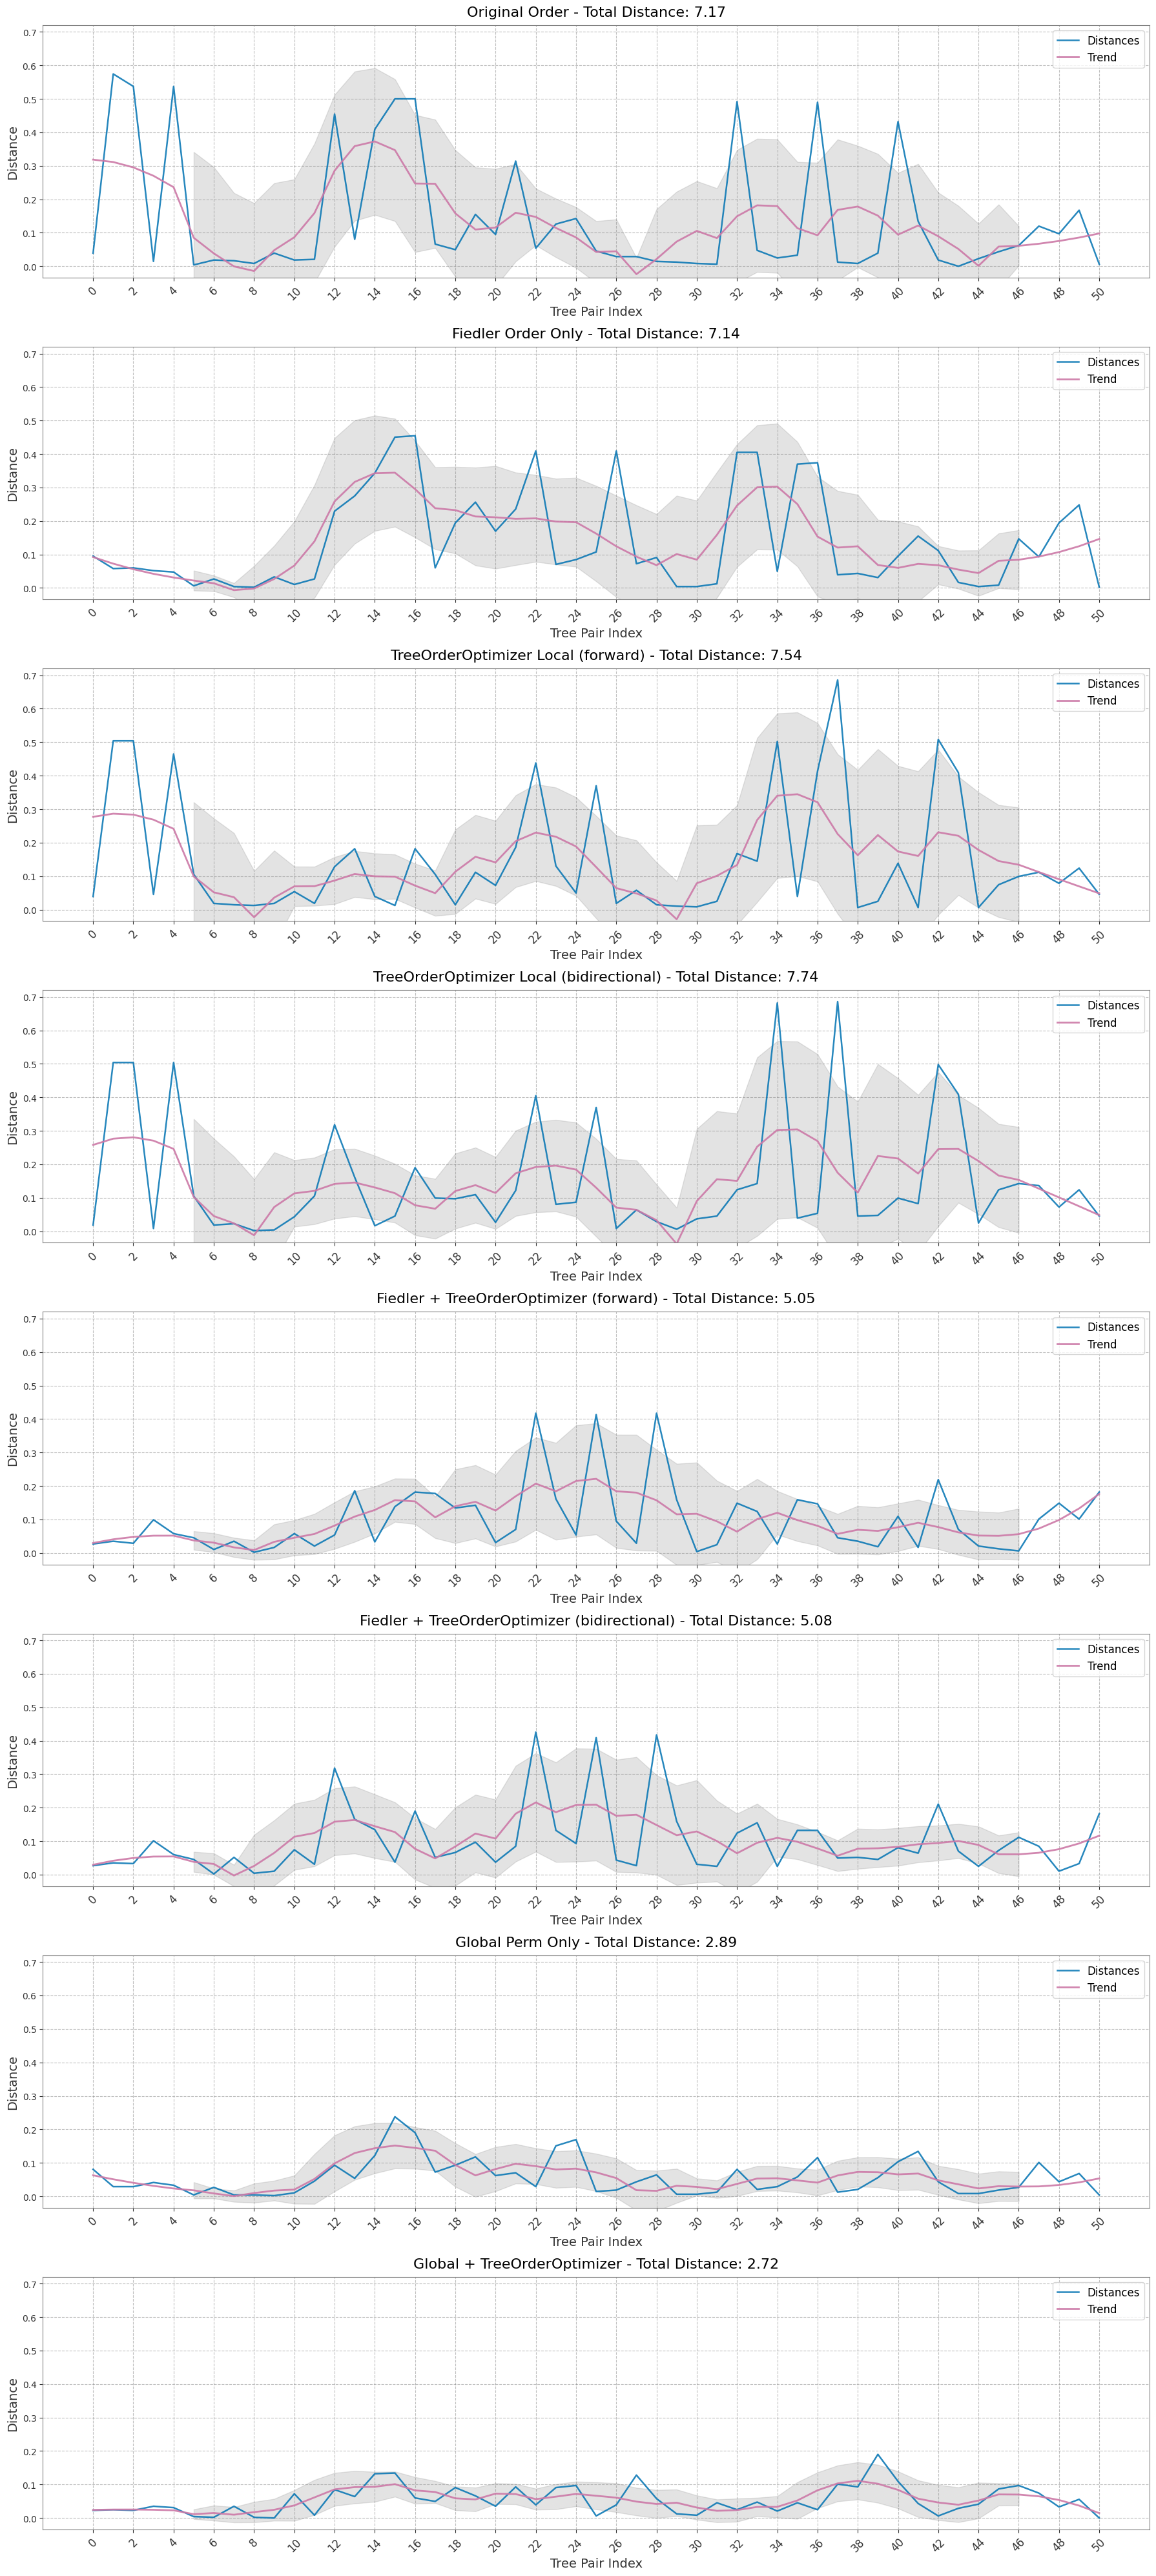

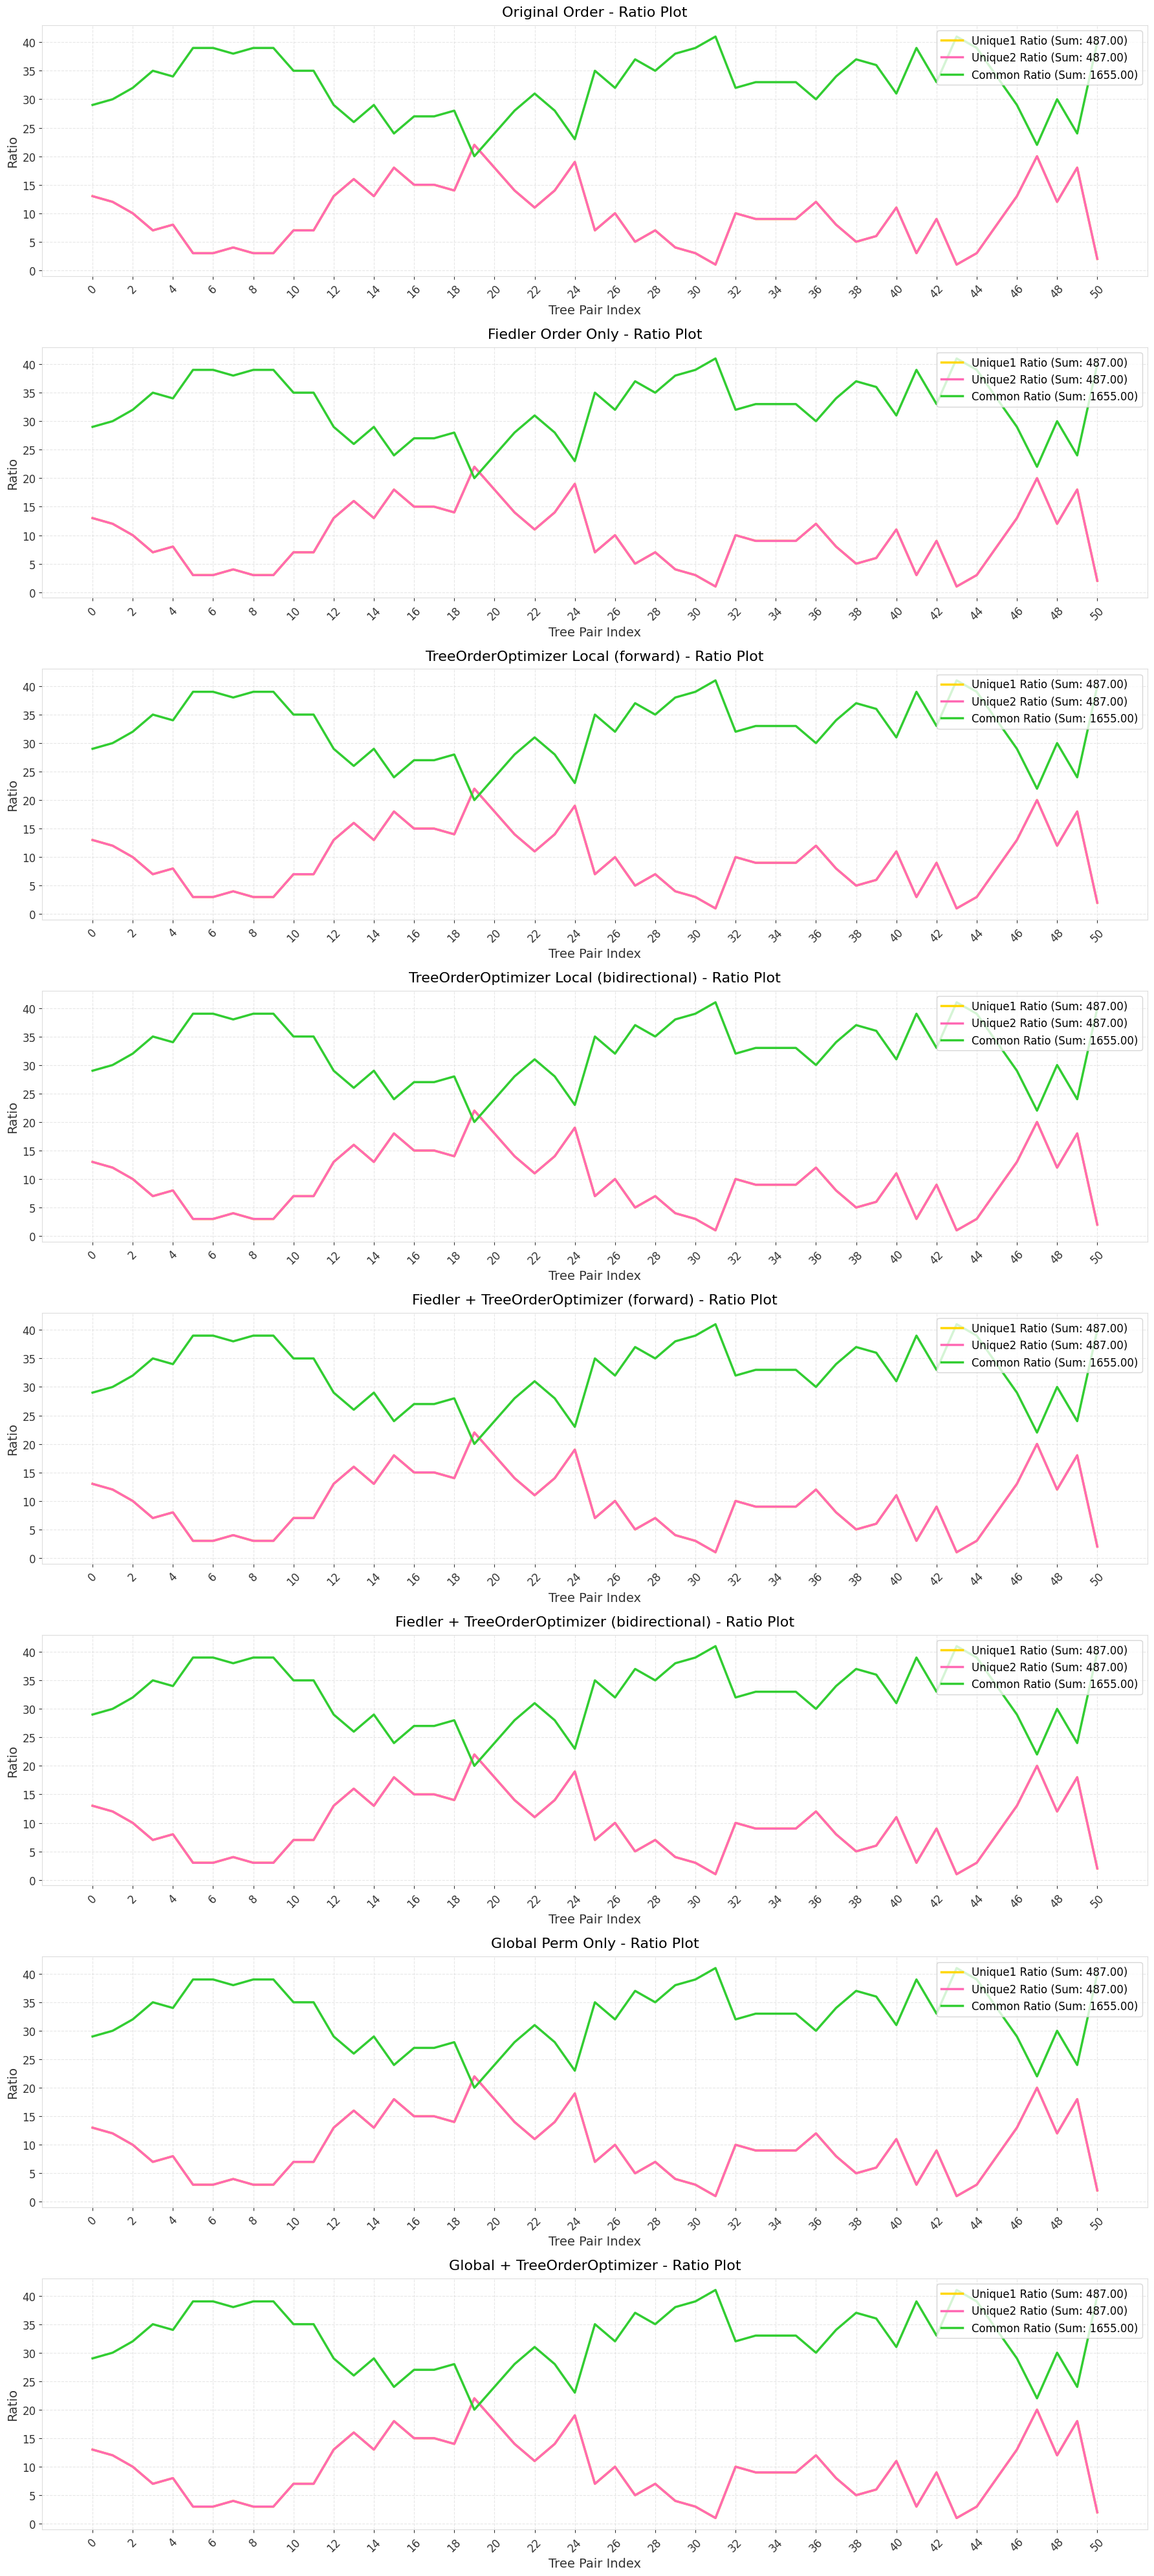

INFO:root:Profiling completed successfully.



Profile Summary:
Total time: 54.33s
Number of unique functions: 21

Top 5 time-consuming functions:
                                       Function  Total Time (s)     Time %     Calls
10                     get_leaves (tree.py:289)        5.929615  10.913666    383548
11                          __eq__ (tree.py:96)        5.123749   9.430441  23940131
5       <built-in method builtins.sorted> (~:0)        4.016555   7.392612   3915398
4   <built-in method builtins.isinstance> (~:0)        3.076531   5.662464  75526012
20                     __eq__ (partition.py:42)        2.717575   5.001793  24068170


Function  \
3               <built-in method builtins.hash> (~:0)   
14                            to_splits (tree.py:114)   
2               <method 'add' of 'set' objects> (~:0)   
15                         __hash__ (partition.py:92)   
18  <method 'encode' of 'ImagingEncoder' objects> ...   
1           <method 'extend' of 'list' objects> (~:0)   
0                               inner (typing.py:392)   
19  classify_subtrees_using_set_ops (tree_order_ut...   
16                    <lambda> (partition_set.py:179)   
7                     __init__ (partition_set.py:139)   
12                    __iter__ (partition_set.py:177)   
6          isdisjoint (<frozen _collections_abc>:625)   
17   _collect_subtree_splits (tree_order_utils.py:21)   
13                             __hash__ (tree.py:101)   
9                          add (partition_set.py:184)   
8                 __contains__ (partition_set.py:166)   
20                           __eq__ (partition.py:42)   
4         <built-in method builtins.isinstance> (~:0)   
5             <built-in method builtins.sorted> (~:0)   
11                                __eq__ (tree.py:96)   
10                           get_leaves (tree.py:289)   

                       Module  Line  \
3                           ~     0   
14                    tree.py   114   
2                           ~     0   
15               partition.py    92   
18                          ~     0   
1                           ~     0   
0                   typing.py   392   
19        tree_order_utils.py    51   
16           partition_set.py   179   
7            partition_set.py   139   
12           partition_set.py   177   
6   <frozen _collections_abc>   625   
17        tree_order_utils.py    21   
13                    tree.py   101   
9            partition_set.py   184   
8            partition_set.py   166   
20               partition.py    42   
4                           ~     0   
5                           ~     0   
11                    tree.py    96   
10                    tree.py   289   

                                             Name     Calls  Total Time (s)  \
3                 <built-in method builtins.hash>  10367106        0.647234   
14                                      to_splits   1965307        0.749817   
2                 <method 'add' of 'set' objects>   7356017        0.787225   
15                                       __hash__   8277938        0.891309   
18  <method 'encode' of 'ImagingEncoder' objects>        35        1.064247   
1             <method 'extend' of 'list' objects>  12666428        1.147408   
0                                           inner  12233381        1.327036   
19                classify_subtrees_using_set_ops     11227        1.368948   
16                                       <lambda>  37448319        1.543564   
7                                        __init__   1177674        1.604941   
12                                       __iter__   3894088        1.693241   
6                                      isdisjoint    965522        1.727921   
17                        _collect_subtree_splits     11227        1.932352   
13                                       __hash__   1940805        1.945651   
9                                             add   6833005        2.016155   
8                                    __contains__  18819057        2.158907   
20                                         __eq__  24068170        2.717575   
4           <built-in method builtins.isinstance>  75526012        3.076531   
5               <built-in method builtins.sorted>   3915398        4.016555   
11                                         __eq__  23940131        5.123749   
10                                     get_leaves    383548        5.929615   

    Time/Call (ms)  Cumulative (s)     Time %  Callers  
3         0.000062        0.706856   1.191258       11  
14        0.000382        2.596877   1.380065        5  
2         0.000107   

In [ ]:
profile_and_visualize(
    "./../data/output_norovirus_window_size_200_10/best_trees.newick",
)


In [4]:
profile_and_visualize(
    "./../data/alltrees/alltrees.trees.newick",
)

INFO:root:Starting profiling...
ERROR:root:An error occurred during profiling: All trees must have the same leaves in the same order for consensus Fiedler ordering.
Found leaf name lists: [('O1', 'O2', 'C1', 'X', 'B1', 'C2', 'D1', 'D2', 'A1', 'A2', 'B2'), ('O1', 'O2', 'C1', 'X', 'B1', 'B2', 'C2', 'D1', 'D2', 'A1', 'A2'), ('O1', 'O2', 'B2', 'C1', 'X', 'B1', 'D1', 'C2', 'D2', 'A1', 'A2'), ('O1', 'O2', 'A1', 'B2', 'C1', 'B1', 'X', 'C2', 'D1', 'D2', 'A2'), ('O1', 'O2', 'D2', 'D1', 'C1', 'B1', 'A1', 'X', 'A2', 'B2', 'C2'), ('O1', 'O2', 'D2', 'D1', 'A1', 'B2', 'C1', 'B1', 'X', 'A2', 'C2'), ('O1', 'O2', 'A1', 'D2', 'B2', 'D1', 'C1', 'B1', 'X', 'A2', 'C2'), ('O1', 'O2', 'D2', 'D1', 'C1', 'B1', 'X', 'A2', 'C2', 'A1', 'B2'), ('O1', 'O2', 'D1', 'D2', 'A1', 'B2', 'A2', 'X', 'C1', 'B1', 'C2'), ('O1', 'O2', 'D2', 'D1', 'C1', 'A1', 'B2', 'B1', 'X', 'A2', 'C2'), ('O1', 'O2', 'D2', 'A1', 'B2', 'D1', 'C1', 'X', 'C2', 'A2', 'B1'), ('O1', 'O2', 'A1', 'A2', 'B1', 'D2', 'D1', 'B2', 'C1', 'X', 'C2'), ('O1', 

Original Order: No reordering or optimization; baseline.


ValueError: All trees must have the same leaves in the same order for consensus Fiedler ordering.
Found leaf name lists: [('O1', 'O2', 'C1', 'X', 'B1', 'C2', 'D1', 'D2', 'A1', 'A2', 'B2'), ('O1', 'O2', 'C1', 'X', 'B1', 'B2', 'C2', 'D1', 'D2', 'A1', 'A2'), ('O1', 'O2', 'B2', 'C1', 'X', 'B1', 'D1', 'C2', 'D2', 'A1', 'A2'), ('O1', 'O2', 'A1', 'B2', 'C1', 'B1', 'X', 'C2', 'D1', 'D2', 'A2'), ('O1', 'O2', 'D2', 'D1', 'C1', 'B1', 'A1', 'X', 'A2', 'B2', 'C2'), ('O1', 'O2', 'D2', 'D1', 'A1', 'B2', 'C1', 'B1', 'X', 'A2', 'C2'), ('O1', 'O2', 'A1', 'D2', 'B2', 'D1', 'C1', 'B1', 'X', 'A2', 'C2'), ('O1', 'O2', 'D2', 'D1', 'C1', 'B1', 'X', 'A2', 'C2', 'A1', 'B2'), ('O1', 'O2', 'D1', 'D2', 'A1', 'B2', 'A2', 'X', 'C1', 'B1', 'C2'), ('O1', 'O2', 'D2', 'D1', 'C1', 'A1', 'B2', 'B1', 'X', 'A2', 'C2'), ('O1', 'O2', 'D2', 'A1', 'B2', 'D1', 'C1', 'X', 'C2', 'A2', 'B1'), ('O1', 'O2', 'A1', 'A2', 'B1', 'D2', 'D1', 'B2', 'C1', 'X', 'C2'), ('O1', 'O2', 'A1', 'A2', 'B1', 'C2', 'D2', 'D1', 'B2', 'C1', 'X'), ('O1', 'O2', 'A1', 'B2', 'D1', 'B1', 'C2', 'D2', 'A2', 'C1', 'X'), ('O1', 'O2', 'A1', 'B1', 'C2', 'D2', 'A2', 'D1', 'B2', 'C1', 'X'), ('O1', 'O2', 'C1', 'X', 'C2', 'B1', 'A2', 'A1', 'B2', 'D1', 'D2'), ('O1', 'O2', 'C1', 'X', 'C2', 'D1', 'D2', 'B1', 'A1', 'B2', 'A2'), ('O1', 'O2', 'C1', 'X', 'C2', 'D1', 'D2', 'B1', 'B2', 'A1', 'A2'), ('O1', 'O2', 'C1', 'X', 'C2', 'D1', 'D2', 'B1', 'B2', 'A2', 'A1'), ('O1', 'O2', 'C1', 'X', 'C2', 'D1', 'D2', 'B1', 'B2', 'A1', 'A2'), ('O1', 'O2', 'C1', 'X', 'C2', 'D1', 'D2', 'B1', 'B2', 'A2', 'A1'), ('O1', 'O2', 'C1', 'X', 'C2', 'D1', 'D2', 'B1', 'B2', 'A2', 'A1'), ('O1', 'O2', 'C1', 'X', 'C2', 'D1', 'D2', 'B1', 'B2', 'A1', 'A2'), ('O1', 'O2', 'C1', 'X', 'C2', 'D1', 'D2', 'B1', 'B2', 'A1', 'A2'), ('O1', 'O2', 'C1', 'X', 'C2', 'D1', 'D2', 'B1', 'B2', 'A1', 'A2'), ('O1', 'O2', 'C1', 'X', 'C2', 'D1', 'D2', 'B1', 'B2', 'A1', 'A2'), ('O1', 'O2', 'C1', 'X', 'C2', 'D1', 'D2', 'B1', 'B2', 'A1', 'A2'), ('O1', 'O2', 'C1', 'X', 'C2', 'D1', 'D2', 'B1', 'B2', 'A1', 'A2'), ('O1', 'O2', 'C1', 'X', 'C2', 'D1', 'D2', 'B1', 'B2', 'A1', 'A2'), ('O1', 'O2', 'C1', 'X', 'C2', 'D1', 'D2', 'B1', 'B2', 'A1', 'A2'), ('O1', 'O2', 'C1', 'X', 'C2', 'D1', 'D2', 'B1', 'B2', 'A1', 'A2'), ('O1', 'O2', 'C1', 'X', 'C2', 'D1', 'D2', 'B1', 'B2', 'A1', 'A2'), ('O1', 'O2', 'C1', 'X', 'C2', 'D1', 'D2', 'B1', 'B2', 'A1', 'A2'), ('O1', 'O2', 'C1', 'X', 'C2', 'D1', 'D2', 'B1', 'B2', 'A1', 'A2'), ('O1', 'O2', 'C1', 'X', 'C2', 'D1', 'D2', 'B1', 'B2', 'A1', 'A2'), ('O1', 'O2', 'C1', 'X', 'C2', 'D1', 'D2', 'B1', 'B2', 'A1', 'A2'), ('O1', 'O2', 'C1', 'X', 'C2', 'D1', 'D2', 'B1', 'B2', 'A1', 'A2'), ('O1', 'O2', 'C1', 'X', 'C2', 'D1', 'D2', 'B1', 'B2', 'A1', 'A2'), ('O1', 'O2', 'C1', 'X', 'C2', 'D1', 'D2', 'B1', 'B2', 'A1', 'A2'), ('O1', 'O2', 'C1', 'X', 'C2', 'D1', 'D2', 'B1', 'B2', 'A1', 'A2'), ('O1', 'O2', 'C1', 'X', 'C2', 'D1', 'D2', 'B1', 'B2', 'A1', 'A2'), ('O1', 'O2', 'C1', 'X', 'C2', 'D1', 'D2', 'B1', 'B2', 'A1', 'A2'), ('O1', 'O2', 'C1', 'X', 'C2', 'D1', 'D2', 'B1', 'B2', 'A1', 'A2'), ('O1', 'O2', 'C1', 'X', 'C2', 'D1', 'D2', 'B1', 'B2', 'A1', 'A2'), ('O1', 'O2', 'C1', 'X', 'C2', 'D1', 'D2', 'B1', 'B2', 'A1', 'A2'), ('O1', 'O2', 'C1', 'X', 'C2', 'D1', 'D2', 'B1', 'B2', 'A1', 'A2'), ('O1', 'O2', 'C1', 'X', 'C2', 'D1', 'D2', 'B1', 'B2', 'A1', 'A2'), ('O1', 'O2', 'C1', 'X', 'C2', 'D1', 'D2', 'B1', 'B2', 'A1', 'A2'), ('O1', 'O2', 'C1', 'X', 'C2', 'D1', 'D2', 'B1', 'B2', 'A1', 'A2'), ('O1', 'O2', 'C1', 'X', 'C2', 'D1', 'D2', 'B1', 'B2', 'A1', 'A2'), ('O1', 'O2', 'C1', 'X', 'C2', 'D1', 'D2', 'B1', 'B2', 'A1', 'A2'), ('O1', 'O2', 'C1', 'X', 'C2', 'D1', 'D2', 'B1', 'B2', 'A1', 'A2'), ('O1', 'O2', 'C1', 'X', 'C2', 'D1', 'D2', 'B1', 'B2', 'A1', 'A2'), ('O1', 'O2', 'C1', 'X', 'C2', 'D1', 'D2', 'B1', 'B2', 'A1', 'A2'), ('O1', 'O2', 'C1', 'X', 'C2', 'D1', 'D2', 'B1', 'B2', 'A1', 'A2'), ('O1', 'O2', 'C1', 'X', 'C2', 'D1', 'D2', 'B1', 'B2', 'A1', 'A2'), ('O1', 'O2', 'C1', 'X', 'C2', 'D1', 'D2', 'B1', 'B2', 'A1', 'A2'), ('O1', 'O2', 'C1', 'X', 'C2', 'D1', 'D2', 'B1', 'B2', 'A1', 'A2'), ('O1', 'O2', 'C1', 'X', 'C2', 'D1', 'D2', 'B1', 'B2', 'A1', 'A2'), ('O1', 'O2', 'C1', 'X', 'C2', 'D1', 'D2', 'B1', 'B2', 'A1', 'A2'), ('O1', 'O2', 'C1', 'X', 'C2', 'D1', 'D2', 'B1', 'B2', 'A1', 'A2'), ('O1', 'O2', 'C1', 'X', 'C2', 'D1', 'D2', 'B1', 'B2', 'A1', 'A2'), ('O1', 'O2', 'C1', 'X', 'C2', 'D1', 'D2', 'B1', 'B2', 'A1', 'A2'), ('O1', 'O2', 'C1', 'X', 'C2', 'D1', 'D2', 'B1', 'B2', 'A1', 'A2'), ('O1', 'O2', 'C1', 'X', 'C2', 'D1', 'D2', 'B1', 'B2', 'A1', 'A2'), ('O1', 'O2', 'C1', 'X', 'C2', 'D1', 'D2', 'B1', 'B2', 'A2', 'A1'), ('O1', 'O2', 'C1', 'X', 'C2', 'D1', 'D2', 'B1', 'B2', 'A2', 'A1'), ('O1', 'O2', 'C1', 'X', 'C2', 'D1', 'D2', 'B1', 'B2', 'A2', 'A1'), ('O1', 'O2', 'C1', 'X', 'C2', 'D1', 'D2', 'B1', 'B2', 'A2', 'A1'), ('O1', 'O2', 'C1', 'X', 'C2', 'D1', 'D2', 'B1', 'B2', 'A1', 'A2'), ('O1', 'O2', 'C1', 'X', 'C2', 'D1', 'D2', 'B1', 'B2', 'A1', 'A2'), ('O1', 'O2', 'C1', 'X', 'C2', 'D1', 'D2', 'B1', 'B2', 'A1', 'A2'), ('O1', 'O2', 'C1', 'X', 'C2', 'D1', 'D2', 'B1', 'B2', 'A1', 'A2'), ('O1', 'O2', 'C1', 'X', 'C2', 'D1', 'D2', 'B1', 'B2', 'A1', 'A2'), ('O1', 'O2', 'C1', 'X', 'C2', 'D1', 'D2', 'B1', 'B2', 'A1', 'A2'), ('O1', 'O2', 'C1', 'X', 'C2', 'D1', 'D2', 'B1', 'B2', 'A1', 'A2'), ('O1', 'O2', 'C1', 'X', 'C2', 'D1', 'D2', 'B1', 'B2', 'A1', 'A2'), ('O1', 'O2', 'C1', 'C2', 'X', 'D1', 'D2', 'B1', 'B2', 'A1', 'A2'), ('O1', 'O2', 'C1', 'C2', 'X', 'D1', 'D2', 'B1', 'B2', 'A1', 'A2'), ('O1', 'O2', 'C1', 'C2', 'D1', 'D2', 'X', 'B1', 'B2', 'A1', 'A2'), ('O1', 'O2', 'C1', 'C2', 'D1', 'D2', 'X', 'B1', 'B2', 'A1', 'A2'), ('O1', 'O2', 'C1', 'C2', 'D1', 'D2', 'X', 'B1', 'B2', 'A1', 'A2'), ('O1', 'O2', 'C1', 'C2', 'D1', 'D2', 'X', 'A1', 'A2', 'B1', 'B2'), ('O1', 'O2', 'C1', 'C2', 'D1', 'D2', 'X', 'A1', 'A2', 'B1', 'B2'), ('O1', 'O2', 'C1', 'C2', 'D1', 'D2', 'X', 'A1', 'A2', 'B1', 'B2'), ('O1', 'O2', 'C1', 'C2', 'D1', 'D2', 'X', 'A1', 'A2', 'B1', 'B2'), ('O1', 'O2', 'C1', 'C2', 'D1', 'D2', 'X', 'A1', 'A2', 'B1', 'B2'), ('O1', 'O2', 'C1', 'C2', 'D1', 'D2', 'X', 'A1', 'A2', 'B1', 'B2'), ('O1', 'O2', 'C1', 'C2', 'D1', 'D2', 'X', 'A1', 'A2', 'B1', 'B2'), ('O1', 'O2', 'C1', 'C2', 'D1', 'D2', 'X', 'A1', 'A2', 'B1', 'B2'), ('O1', 'O2', 'C1', 'C2', 'D1', 'D2', 'X', 'A1', 'A2', 'B1', 'B2'), ('O1', 'O2', 'C1', 'C2', 'D1', 'D2', 'X', 'A1', 'A2', 'B1', 'B2'), ('O1', 'O2', 'C1', 'C2', 'D1', 'D2', 'X', 'A1', 'A2', 'B1', 'B2'), ('O1', 'O2', 'C1', 'C2', 'D1', 'D2', 'X', 'A1', 'A2', 'B1', 'B2'), ('O1', 'O2', 'C1', 'C2', 'D1', 'D2', 'X', 'A1', 'A2', 'B1', 'B2'), ('O1', 'O2', 'C1', 'C2', 'D1', 'D2', 'X', 'A1', 'A2', 'B1', 'B2'), ('O1', 'O2', 'C1', 'C2', 'D1', 'D2', 'X', 'A1', 'A2', 'B1', 'B2'), ('O1', 'O2', 'C1', 'C2', 'D1', 'D2', 'X', 'A1', 'A2', 'B1', 'B2'), ('O1', 'O2', 'C1', 'C2', 'D1', 'D2', 'X', 'A1', 'A2', 'B1', 'B2'), ('O1', 'O2', 'C1', 'C2', 'D1', 'D2', 'X', 'A1', 'A2', 'B1', 'B2'), ('O1', 'O2', 'C1', 'C2', 'D1', 'D2', 'X', 'A1', 'A2', 'B1', 'B2'), ('O1', 'O2', 'C1', 'C2', 'D1', 'D2', 'X', 'A1', 'A2', 'B1', 'B2'), ('O1', 'O2', 'C1', 'C2', 'D1', 'D2', 'X', 'A1', 'A2', 'B1', 'B2'), ('O1', 'O2', 'C1', 'C2', 'D1', 'D2', 'X', 'A1', 'A2', 'B1', 'B2'), ('O1', 'O2', 'C1', 'C2', 'D1', 'D2', 'X', 'A1', 'A2', 'B1', 'B2'), ('O1', 'O2', 'C1', 'C2', 'D1', 'D2', 'X', 'A1', 'A2', 'B1', 'B2'), ('O1', 'O2', 'C1', 'C2', 'D1', 'D2', 'X', 'A1', 'A2', 'B1', 'B2'), ('O1', 'O2', 'C1', 'C2', 'D1', 'D2', 'X', 'A1', 'A2', 'B1', 'B2'), ('O1', 'O2', 'C1', 'C2', 'D1', 'D2', 'X', 'A1', 'A2', 'B1', 'B2'), ('O1', 'O2', 'C1', 'C2', 'D1', 'D2', 'X', 'A1', 'A2', 'B1', 'B2'), ('O1', 'O2', 'C1', 'C2', 'D1', 'D2', 'X', 'A1', 'A2', 'B1', 'B2'), ('O1', 'O2', 'C1', 'C2', 'D1', 'D2', 'X', 'A1', 'B1', 'B2', 'A2'), ('O1', 'O2', 'C1', 'C2', 'D1', 'D2', 'X', 'A1', 'B1', 'B2', 'A2'), ('O1', 'O2', 'C1', 'C2', 'D1', 'D2', 'X', 'A1', 'B1', 'B2', 'A2'), ('O1', 'O2', 'C1', 'C2', 'D1', 'D2', 'X', 'A1', 'B1', 'B2', 'A2'), ('O1', 'O2', 'C1', 'C2', 'D1', 'D2', 'X', 'A1', 'A2', 'B1', 'B2'), ('O1', 'O2', 'C1', 'C2', 'D1', 'D2', 'X', 'A1', 'A2', 'B1', 'B2'), ('O1', 'O2', 'C1', 'C2', 'D1', 'D2', 'X', 'A1', 'A2', 'B1', 'B2'), ('O1', 'O2', 'C1', 'C2', 'D1', 'D2', 'X', 'A1', 'A2', 'B1', 'B2'), ('O1', 'O2', 'C1', 'C2', 'D1', 'D2', 'X', 'A1', 'A2', 'B1', 'B2'), ('O1', 'O2', 'C1', 'C2', 'D1', 'D2', 'X', 'A1', 'A2', 'B1', 'B2'), ('O1', 'O2', 'C1', 'C2', 'D1', 'D2', 'X', 'A1', 'A2', 'B1', 'B2'), ('O1', 'O2', 'C1', 'C2', 'D1', 'D2', 'X', 'A1', 'A2', 'B1', 'B2'), ('O1', 'O2', 'C1', 'C2', 'D1', 'D2', 'X', 'A1', 'A2', 'B1', 'B2'), ('O1', 'O2', 'C1', 'C2', 'D1', 'D2', 'X', 'A1', 'A2', 'B1', 'B2'), ('O1', 'O2', 'C1', 'C2', 'D1', 'D2', 'X', 'A1', 'A2', 'B1', 'B2'), ('O1', 'O2', 'C1', 'C2', 'D1', 'D2', 'X', 'A1', 'A2', 'B1', 'B2'), ('O1', 'O2', 'C1', 'C2', 'D1', 'D2', 'X', 'A1', 'A2', 'B1', 'B2'), ('O1', 'O2', 'C1', 'C2', 'D1', 'D2', 'X', 'A1', 'A2', 'B1', 'B2'), ('O1', 'O2', 'C1', 'C2', 'D1', 'D2', 'X', 'A1', 'A2', 'B1', 'B2'), ('O1', 'O2', 'C1', 'C2', 'D1', 'D2', 'X', 'A1', 'A2', 'B1', 'B2'), ('O1', 'O2', 'C1', 'C2', 'D1', 'D2', 'X', 'A1', 'A2', 'B1', 'B2'), ('O1', 'O2', 'C1', 'C2', 'D1', 'D2', 'X', 'A1', 'A2', 'B1', 'B2'), ('O1', 'O2', 'C1', 'C2', 'D1', 'D2', 'X', 'A1', 'A2', 'B1', 'B2'), ('O1', 'O2', 'C1', 'C2', 'D1', 'D2', 'X', 'A1', 'A2', 'B1', 'B2'), ('O1', 'O2', 'C1', 'C2', 'D1', 'D2', 'X', 'A1', 'A2', 'B1', 'B2'), ('O1', 'O2', 'C1', 'C2', 'D1', 'D2', 'X', 'A1', 'A2', 'B1', 'B2'), ('O1', 'O2', 'C1', 'C2', 'D1', 'D2', 'X', 'A1', 'A2', 'B1', 'B2'), ('O1', 'O2', 'C1', 'C2', 'D1', 'D2', 'X', 'A1', 'A2', 'B1', 'B2'), ('O1', 'O2', 'C1', 'C2', 'D1', 'D2', 'X', 'A1', 'A2', 'B1', 'B2'), ('O1', 'O2', 'C1', 'C2', 'B1', 'B2', 'D2', 'D1', 'X', 'A1', 'A2'), ('O1', 'O2', 'C1', 'C2', 'B1', 'B2', 'D2', 'D1', 'X', 'A1', 'A2'), ('O1', 'O2', 'C1', 'C2', 'B1', 'B2', 'D2', 'D1', 'X', 'A1', 'A2'), ('O1', 'O2', 'C1', 'C2', 'B1', 'B2', 'D2', 'D1', 'X', 'A1', 'A2'), ('O1', 'O2', 'C1', 'C2', 'B1', 'B2', 'D2', 'D1', 'X', 'A1', 'A2'), ('O1', 'O2', 'C1', 'C2', 'B1', 'B2', 'D2', 'D1', 'X', 'A1', 'A2'), ('O1', 'O2', 'C1', 'C2', 'B1', 'B2', 'D2', 'D1', 'X', 'A1', 'A2'), ('O1', 'O2', 'C1', 'C2', 'B1', 'B2', 'D2', 'D1', 'X', 'A1', 'A2'), ('O1', 'O2', 'C1', 'C2', 'B1', 'B2', 'D2', 'D1', 'X', 'A1', 'A2'), ('O1', 'O2', 'C1', 'C2', 'B1', 'B2', 'D2', 'D1', 'X', 'A1', 'A2'), ('O1', 'O2', 'C1', 'C2', 'B1', 'B2', 'D2', 'D1', 'X', 'A1', 'A2'), ('O1', 'O2', 'C1', 'C2', 'B1', 'B2', 'D1', 'D2', 'X', 'A1', 'A2'), ('O1', 'O2', 'C1', 'C2', 'B1', 'B2', 'D1', 'D2', 'X', 'A1', 'A2'), ('O1', 'O2', 'C1', 'C2', 'X', 'A1', 'A2', 'B1', 'B2', 'D1', 'D2'), ('O1', 'O2', 'C1', 'C2', 'X', 'A1', 'A2', 'B1', 'B2', 'D1', 'D2'), ('O1', 'O2', 'C1', 'C2', 'B1', 'B2', 'D2', 'D1', 'X', 'A1', 'A2'), ('O1', 'O2', 'C1', 'C2', 'B1', 'B2', 'D2', 'D1', 'X', 'A1', 'A2'), ('O1', 'O2', 'C1', 'C2', 'B1', 'B2', 'D2', 'D1', 'X', 'A1', 'A2'), ('O1', 'O2', 'C1', 'C2', 'B1', 'D2', 'B2', 'D1', 'X', 'A1', 'A2'), ('O1', 'O2', 'C1', 'C2', 'B1', 'B2', 'D2', 'D1', 'X', 'A1', 'A2'), ('O1', 'O2', 'C1', 'C2', 'B1', 'B2', 'D2', 'D1', 'X', 'A1', 'A2'), ('O1', 'O2', 'C1', 'C2', 'B1', 'B2', 'D2', 'D1', 'X', 'A1', 'A2'), ('O1', 'O2', 'C1', 'C2', 'B1', 'B2', 'D2', 'D1', 'X', 'A1', 'A2'), ('O1', 'O2', 'C1', 'C2', 'B1', 'B2', 'D2', 'D1', 'X', 'A1', 'A2'), ('O1', 'O2', 'C1', 'C2', 'B1', 'B2', 'D2', 'D1', 'X', 'A1', 'A2'), ('O1', 'O2', 'C1', 'C2', 'B1', 'B2', 'D2', 'D1', 'X', 'A1', 'A2'), ('O1', 'O2', 'C1', 'C2', 'B1', 'B2', 'D2', 'D1', 'X', 'A1', 'A2'), ('O1', 'O2', 'C1', 'C2', 'B1', 'B2', 'D2', 'D1', 'X', 'A1', 'A2'), ('O1', 'O2', 'C1', 'C2', 'B1', 'B2', 'D2', 'D1', 'X', 'A1', 'A2'), ('O1', 'O2', 'C1', 'C2', 'B1', 'B2', 'D2', 'D1', 'X', 'A1', 'A2'), ('O1', 'O2', 'C1', 'C2', 'B1', 'B2', 'D2', 'D1', 'X', 'A1', 'A2'), ('O1', 'O2', 'C1', 'C2', 'B1', 'B2', 'D2', 'D1', 'X', 'A1', 'A2'), ('O1', 'O2', 'C1', 'C2', 'B1', 'B2', 'D2', 'D1', 'X', 'A1', 'A2'), ('O1', 'O2', 'C1', 'C2', 'B1', 'B2', 'D2', 'D1', 'X', 'A1', 'A2'), ('O1', 'O2', 'C1', 'C2', 'B1', 'B2', 'D2', 'D1', 'X', 'A1', 'A2'), ('O1', 'O2', 'C1', 'C2', 'B1', 'B2', 'D2', 'D1', 'X', 'A1', 'A2'), ('O1', 'O2', 'C1', 'C2', 'B1', 'B2', 'D2', 'D1', 'X', 'A1', 'A2'), ('O1', 'O2', 'C1', 'C2', 'B1', 'B2', 'D2', 'D1', 'X', 'A1', 'A2'), ('O1', 'O2', 'C1', 'C2', 'B1', 'B2', 'D2', 'D1', 'X', 'A1', 'A2'), ('O1', 'O2', 'C1', 'C2', 'B1', 'B2', 'D2', 'D1', 'X', 'A1', 'A2'), ('O1', 'O2', 'C1', 'C2', 'B1', 'B2', 'D2', 'D1', 'X', 'A1', 'A2'), ('O1', 'O2', 'C1', 'C2', 'B1', 'B2', 'D2', 'D1', 'X', 'A1', 'A2'), ('O1', 'O2', 'C1', 'C2', 'B1', 'B2', 'D2', 'D1', 'X', 'A1', 'A2'), ('O1', 'O2', 'C1', 'C2', 'B1', 'B2', 'D2', 'D1', 'X', 'A1', 'A2'), ('O1', 'O2', 'C1', 'C2', 'B1', 'B2', 'D2', 'D1', 'X', 'A1', 'A2'), ('O1', 'O2', 'C1', 'C2', 'B1', 'B2', 'D2', 'D1', 'X', 'A1', 'A2'), ('O1', 'O2', 'C1', 'C2', 'B1', 'B2', 'D2', 'D1', 'X', 'A1', 'A2'), ('O1', 'O2', 'C1', 'C2', 'B1', 'B2', 'D2', 'D1', 'X', 'A1', 'A2'), ('O1', 'O2', 'C1', 'C2', 'B1', 'B2', 'D2', 'D1', 'X', 'A1', 'A2'), ('O1', 'O2', 'C1', 'C2', 'B1', 'B2', 'D2', 'D1', 'X', 'A1', 'A2'), ('O1', 'O2', 'C1', 'C2', 'B1', 'B2', 'D2', 'D1', 'X', 'A1', 'A2'), ('O1', 'O2', 'C1', 'C2', 'B1', 'B2', 'D2', 'D1', 'X', 'A1', 'A2'), ('O1', 'O2', 'C1', 'C2', 'B1', 'B2', 'D2', 'D1', 'X', 'A1', 'A2'), ('O1', 'O2', 'C1', 'C2', 'B1', 'B2', 'D2', 'D1', 'X', 'A1', 'A2'), ('O1', 'O2', 'C1', 'C2', 'B1', 'B2', 'D2', 'D1', 'X', 'A1', 'A2'), ('O1', 'O2', 'C1', 'C2', 'B1', 'B2', 'D2', 'D1', 'X', 'A1', 'A2'), ('O1', 'O2', 'C1', 'C2', 'B1', 'B2', 'D2', 'D1', 'X', 'A1', 'A2'), ('O1', 'O2', 'C1', 'C2', 'B1', 'B2', 'D2', 'D1', 'X', 'A1', 'A2'), ('O1', 'O2', 'C1', 'C2', 'B1', 'B2', 'D2', 'D1', 'X', 'A1', 'A2'), ('O1', 'O2', 'C1', 'C2', 'B1', 'B2', 'D2', 'D1', 'X', 'A1', 'A2'), ('O1', 'O2', 'C1', 'C2', 'X', 'A1', 'A2', 'B1', 'B2', 'D1', 'D2'), ('O1', 'O2', 'C1', 'C2', 'D1', 'D2', 'X', 'A1', 'A2', 'B1', 'B2'), ('O1', 'O2', 'C1', 'C2', 'D1', 'D2', 'X', 'A1', 'A2', 'B1', 'B2'), ('O1', 'O2', 'C1', 'C2', 'D1', 'D2', 'X', 'A1', 'A2', 'B1', 'B2'), ('O1', 'O2', 'C1', 'C2', 'D1', 'D2', 'X', 'A1', 'A2', 'B1', 'B2'), ('O1', 'O2', 'C1', 'C2', 'D1', 'D2', 'X', 'A1', 'A2', 'B1', 'B2'), ('O1', 'O2', 'C1', 'C2', 'D1', 'D2', 'X', 'A1', 'A2', 'B1', 'B2'), ('O1', 'O2', 'C1', 'C2', 'D1', 'D2', 'X', 'A1', 'A2', 'B1', 'B2'), ('O1', 'O2', 'C1', 'C2', 'D1', 'D2', 'X', 'A1', 'A2', 'B1', 'B2'), ('O1', 'O2', 'C1', 'C2', 'D1', 'D2', 'X', 'A1', 'A2', 'B1', 'B2'), ('O1', 'O2', 'C1', 'C2', 'D1', 'D2', 'X', 'A1', 'A2', 'B1', 'B2'), ('O1', 'O2', 'C1', 'C2', 'D1', 'D2', 'X', 'A1', 'A2', 'B1', 'B2'), ('O1', 'O2', 'C1', 'C2', 'D1', 'D2', 'X', 'A1', 'A2', 'B1', 'B2'), ('O1', 'O2', 'C1', 'C2', 'D1', 'D2', 'X', 'A1', 'A2', 'B1', 'B2'), ('O1', 'O2', 'C1', 'C2', 'D1', 'D2', 'X', 'A1', 'A2', 'B1', 'B2'), ('O1', 'O2', 'C1', 'C2', 'D1', 'D2', 'X', 'A1', 'A2', 'B1', 'B2'), ('O1', 'O2', 'C1', 'C2', 'D1', 'D2', 'X', 'A1', 'A2', 'B1', 'B2'), ('O1', 'O2', 'C1', 'C2', 'D1', 'D2', 'X', 'A1', 'A2', 'B1', 'B2'), ('O1', 'O2', 'C1', 'C2', 'D1', 'D2', 'X', 'A1', 'A2', 'B1', 'B2'), ('O1', 'O2', 'C1', 'C2', 'D1', 'D2', 'X', 'A1', 'A2', 'B1', 'B2'), ('O1', 'O2', 'C1', 'C2', 'D1', 'D2', 'X', 'A1', 'A2', 'B1', 'B2'), ('O1', 'O2', 'C1', 'C2', 'D1', 'D2', 'X', 'A1', 'A2', 'B1', 'B2'), ('O1', 'O2', 'C1', 'C2', 'D1', 'D2', 'X', 'A1', 'A2', 'B1', 'B2'), ('O1', 'O2', 'C1', 'C2', 'D1', 'D2', 'X', 'A1', 'A2', 'B1', 'B2'), ('O1', 'O2', 'C1', 'C2', 'D1', 'D2', 'X', 'A1', 'A2', 'B1', 'B2'), ('O1', 'O2', 'C1', 'C2', 'D1', 'D2', 'X', 'A1', 'A2', 'B1', 'B2'), ('O1', 'O2', 'C1', 'C2', 'D1', 'D2', 'X', 'A1', 'A2', 'B1', 'B2'), ('O1', 'O2', 'C1', 'C2', 'D1', 'D2', 'X', 'A1', 'A2', 'B1', 'B2'), ('O1', 'O2', 'C1', 'C2', 'D1', 'D2', 'X', 'A1', 'A2', 'B1', 'B2'), ('O1', 'O2', 'C1', 'C2', 'D1', 'D2', 'X', 'A1', 'A2', 'B1', 'B2'), ('O1', 'O2', 'C1', 'C2', 'D1', 'D2', 'X', 'A1', 'A2', 'B1', 'B2'), ('O1', 'O2', 'C1', 'C2', 'D1', 'D2', 'X', 'A1', 'A2', 'B1', 'B2'), ('O1', 'O2', 'C1', 'C2', 'D1', 'D2', 'X', 'A1', 'A2', 'B1', 'B2'), ('O1', 'O2', 'C1', 'C2', 'D1', 'D2', 'X', 'A1', 'A2', 'B1', 'B2'), ('O1', 'O2', 'C1', 'C2', 'D1', 'D2', 'X', 'A1', 'A2', 'B1', 'B2'), ('O1', 'O2', 'C1', 'C2', 'D1', 'D2', 'X', 'A1', 'A2', 'B1', 'B2'), ('O1', 'O2', 'C1', 'C2', 'D1', 'D2', 'X', 'A1', 'A2', 'B1', 'B2'), ('O1', 'O2', 'C1', 'C2', 'D1', 'D2', 'X', 'A1', 'A2', 'B1', 'B2'), ('O1', 'O2', 'C1', 'C2', 'D1', 'D2', 'X', 'A1', 'A2', 'B1', 'B2'), ('O1', 'O2', 'C1', 'C2', 'D1', 'D2', 'X', 'A1', 'A2', 'B1', 'B2'), ('O1', 'O2', 'C1', 'C2', 'D1', 'D2', 'X', 'A1', 'A2', 'B1', 'B2'), ('O1', 'O2', 'C1', 'C2', 'D1', 'D2', 'X', 'A1', 'A2', 'B1', 'B2'), ('O1', 'O2', 'C1', 'C2', 'D1', 'D2', 'X', 'A1', 'A2', 'B1', 'B2'), ('O1', 'O2', 'C1', 'C2', 'D1', 'D2', 'X', 'A1', 'A2', 'B1', 'B2'), ('O1', 'O2', 'C1', 'C2', 'D1', 'D2', 'X', 'A1', 'A2', 'B1', 'B2'), ('O1', 'O2', 'C1', 'C2', 'D1', 'D2', 'X', 'A1', 'A2', 'B1', 'B2'), ('O1', 'O2', 'C1', 'C2', 'D1', 'D2', 'X', 'A1', 'A2', 'B1', 'B2'), ('O1', 'O2', 'C1', 'C2', 'D1', 'D2', 'X', 'A1', 'A2', 'B1', 'B2'), ('O1', 'O2', 'C1', 'C2', 'D1', 'D2', 'X', 'A1', 'A2', 'B1', 'B2'), ('O1', 'O2', 'C1', 'C2', 'D1', 'D2', 'X', 'A1', 'A2', 'B1', 'B2'), ('O1', 'O2', 'C1', 'C2', 'D1', 'D2', 'X', 'A1', 'A2', 'B1', 'B2'), ('O1', 'O2', 'C1', 'C2', 'D1', 'D2', 'X', 'A1', 'A2', 'B1', 'B2'), ('O1', 'O2', 'C1', 'C2', 'D1', 'D2', 'X', 'A1', 'A2', 'B1', 'B2'), ('O1', 'O2', 'C1', 'C2', 'D1', 'D2', 'X', 'A1', 'A2', 'B1', 'B2'), ('O1', 'O2', 'C1', 'C2', 'D1', 'D2', 'X', 'A1', 'A2', 'B1', 'B2'), ('O1', 'O2', 'C1', 'C2', 'D1', 'D2', 'X', 'A1', 'A2', 'B1', 'B2'), ('O1', 'O2', 'C1', 'C2', 'D1', 'D2', 'X', 'A1', 'A2', 'B1', 'B2'), ('O1', 'O2', 'C1', 'C2', 'D1', 'D2', 'X', 'A1', 'B1', 'B2', 'A2'), ('O1', 'O2', 'C1', 'C2', 'D1', 'D2', 'X', 'A1', 'B1', 'B2', 'A2'), ('O1', 'O2', 'C1', 'C2', 'D1', 'D2', 'X', 'A1', 'B1', 'B2', 'A2'), ('O1', 'O2', 'C1', 'C2', 'D1', 'D2', 'X', 'A1', 'B1', 'B2', 'A2'), ('O1', 'O2', 'C1', 'C2', 'D1', 'D2', 'X', 'A1', 'A2', 'B1', 'B2'), ('O1', 'O2', 'C1', 'C2', 'D1', 'D2', 'X', 'A1', 'B1', 'B2', 'A2'), ('O1', 'O2', 'C1', 'C2', 'D1', 'D2', 'X', 'A2', 'A1', 'B1', 'B2'), ('O1', 'O2', 'C1', 'C2', 'D1', 'D2', 'X', 'B1', 'B2', 'A2', 'A1'), ('O1', 'O2', 'C1', 'D2', 'X', 'A2', 'B1', 'B2', 'A1', 'C2', 'D1'), ('O1', 'O2', 'C1', 'D1', 'X', 'B1', 'A1', 'B2', 'A2', 'D2', 'C2'), ('O1', 'O2', 'D1', 'A2', 'C2', 'X', 'D2', 'B2', 'A1', 'B1', 'C1'), ('O1', 'O2', 'C2', 'C1', 'B2', 'B1', 'A1', 'D1', 'A2', 'X', 'D2'), ('O1', 'O2', 'C1', 'C2', 'X', 'D2', 'D1', 'A1', 'B2', 'B1', 'A2'), ('O1', 'O2', 'D1', 'B2', 'A2', 'C1', 'C2', 'D2', 'A1', 'B1', 'X'), ('O1', 'O2', 'C1', 'C2', 'X', 'B2', 'D1', 'B1', 'A2', 'A1', 'D2'), ('O1', 'O2', 'D1', 'D2', 'B2', 'A2', 'B1', 'A1', 'C1', 'C2', 'X'), ('O1', 'O2', 'B2', 'D1', 'C1', 'C2', 'X', 'D2', 'B1', 'A2', 'A1'), ('O1', 'O2', 'C1', 'C2', 'X', 'B2', 'D2', 'B1', 'D1', 'A2', 'A1'), ('O1', 'O2', 'X', 'A2', 'D2', 'B1', 'D1', 'C1', 'C2', 'B2', 'A1'), ('O1', 'O2', 'C1', 'C2', 'B2', 'A1', 'X', 'D2', 'D1', 'B1', 'A2'), ('O1', 'O2', 'X', 'D1', 'A2', 'B1', 'A1', 'D2', 'C1', 'C2', 'B2'), ('O1', 'O2', 'X', 'A1', 'B1', 'D1', 'D2', 'A2', 'C1', 'C2', 'B2'), ('O1', 'O2', 'B1', 'D2', 'B2', 'A2', 'X', 'A1', 'D1', 'C1', 'C2')]

In [1]:
%load_ext autoreload
%autoreload 2

profile_and_visualize(
    "./../data/six_taxa_all_permutations.newick",
)

NameError: name 'profile_and_visualize' is not defined

In [ ]:
%load_ext autoreload
%autoreload 2

profile_and_visualize(
    "./../data/alltrees_treees_cutted/alltrees.trees_cutted.newick",
)

## Fiedler (Spectral) Ordering as a Preprocessing Step
This cell demonstrates how to apply consensus Fiedler (spectral) ordering to a set of trees before further optimization or visualization.

In [4]:
from brancharchitect.leaforder.tree_order_optimiser import TreeOrderOptimizer

# Apply Fiedler ordering to a copy of the trees
fiedler_trees = [tree.deep_copy() for tree in original_trees]
optimizer = TreeOrderOptimizer(fiedler_trees)
optimizer.apply_fiedler_ordering()

# Visualize the Fiedler-ordered trees
plot_circular_trees_in_a_row(
    fiedler_trees,
    size=250,
    margin=20,
    label_offset=3,
    ignore_branch_lengths=False,
)

NameError: name 'original_trees' is not defined